### *BANK CUSTOMERS RETIREMENT PREDICTIONS USING SUPPORT ML*



# STEP #1: PROBLEM STATEMENT

You work as a data scientist at a major bank in NYC and you have been tasked to develop a model that can predict whether a customer is able to retire or not based on his/her features. Features are his/her age and net 401K savings (retirement savings in the U.S.). You though that Support Vector Machines can be a great candidate to solve the problem. 

# STEP #2: IMPORTING DATA

In [1]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns # Statistical data visualization
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns


In [2]:
bank_df = pd.read_csv('Bank_Customer_retirement.csv')

# EDA :

In [3]:
bank_df.keys()

Index(['Customer ID', 'Age', '401K Savings', 'Retire'], dtype='object')

In [4]:
bank_df.shape

(500, 4)

In [5]:
bank_df.head()

,Customer ID,Age,401K Savings,Retire
0,0,39.180417,322349.8740,0
1,1,56.101686,768671.5740,1
2,2,57.023043,821505.4718,1
3,3,43.711358,494187.4850,0
4,4,54.728823,691435.7723,1


In [6]:
bank_df.tail()

,Customer ID,Age,401K Savings,Retire
495,495,46.678128,704243.0776,1
496,496,43.545007,483175.9998,0
497,497,46.476724,354919.1987,0
498,498,50.903631,639789.9219,1
499,499,38.590586,491310.0096,0


In [7]:
print("Before: ", bank_df.shape)
bank_df.isnull().sum()
bank_df.drop_duplicates()
print("After: ", bank_df.shape)
bank_df.describe()

Before:  (500, 4)
After:  (500, 4)


,Customer ID,Age,401K Savings,Retire
count,500.000000,500.000000,500.000000,500.000000
mean,249.500000,46.757077,534984.465804,0.500000
std,144.481833,7.790125,187675.818881,0.500501
min,0.000000,25.000000,10.000000,0.000000
25%,124.750000,41.299451,382626.524425,0.000000
50%,249.500000,46.695770,534512.984350,0.500000
75%,374.250000,52.322551,680670.257025,1.000000
max,499.000000,70.000000,1000000.000000,1.000000


# STEP #3: VISUALIZING THE DATA

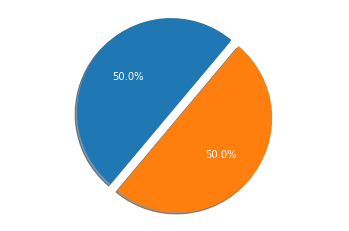

In [8]:
not_played_dict = dict((bank_df['Retire'] == 0).value_counts())
labels = 'Not retired', 'Retired'
sizes = [not_played_dict[True], not_played_dict[False]]
explode = (0.1, 0)

ax = plt.pie(sizes, explode=explode, labels=labels,
    autopct='%1.1f%%', shadow=True, startangle=50, textprops={'color':'white'})

plt.axis('equal')
plt.show()

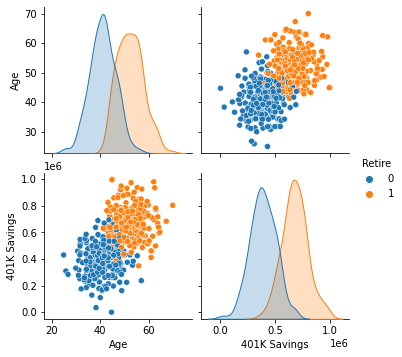

In [9]:
sns.pairplot(bank_df, hue = 'Retire', vars = ['Age', '401K Savings'] )

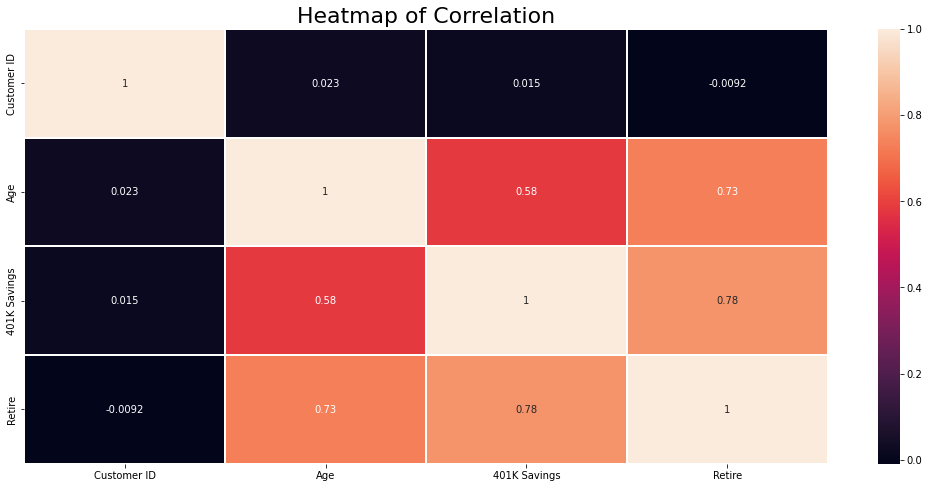

In [10]:
fig, ax = plt.subplots(figsize=(40,30))
corr = bank_df.corr()

sns.heatmap(corr, annot=True, linewidths=0.2)
ax.set_title("Heatmap of Correlation", fontsize = 22)
# set text size for labels on heatmap to 20
fig.set_size_inches(w=18, h= 8)
for text in ax.texts:
    text.set_size(10)

plt.show()

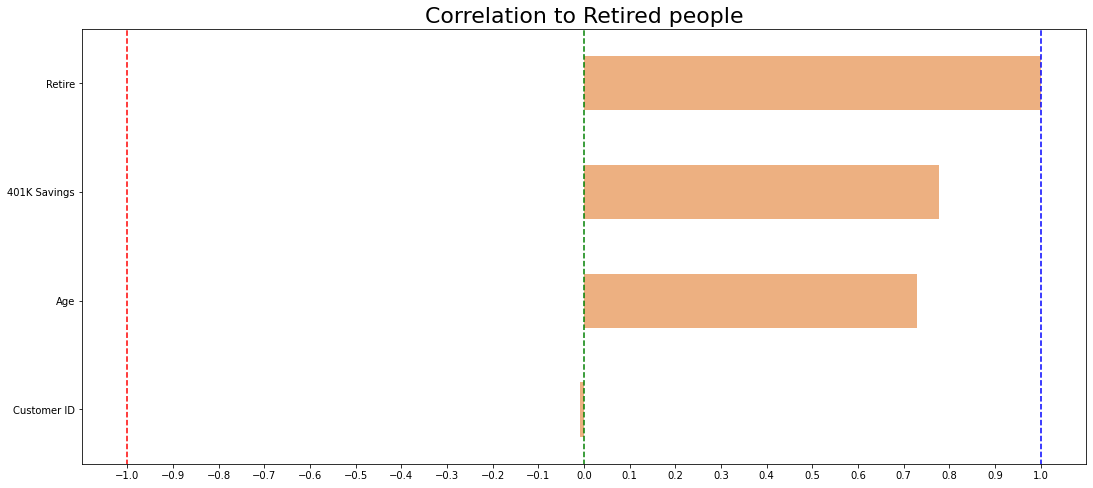

In [11]:
fig, ax = plt.subplots()
bank_df.corr()['Retire'].plot(kind='barh',cmap='flare') # Correlation (to 'parkinson' label) figure.
ax.set_title("Correlation to Retired people", fontsize = 22)
ax.set_xticks([i/10 for i in range(-10,11)])
fig.set_size_inches(w=18, h= 8)
plt.plot([-1,-1], [-1, 23], 'r--')
plt.plot([0,0], [-1, 23], 'g--')
plt.plot([1,1], [-1, 23], 'b--')

# STEP #4: MODEL TRAINING 

In [12]:
bank_df = bank_df.drop(['Customer ID'],axis=1)

In [13]:

# Let's drop the target label coloumns
X = bank_df.drop(['Retire'],axis=1)


In [14]:
X

,Age,401K Savings
0,39.180417,322349.8740
1,56.101686,768671.5740
2,57.023043,821505.4718
3,43.711358,494187.4850
4,54.728823,691435.7723
...,...,...
495,46.678128,704243.0776
496,43.545007,483175.9998
497,46.476724,354919.1987
498,50.903631,639789.9219


In [15]:
y = bank_df['Retire']
y

0      0
1      1
2      1
3      0
4      1
      ..
495    1
496    0
497    0
498    1
499    0
Name: Retire, Length: 500, dtype: int64

<h1>checking for outlaiers

<AxesSubplot:title={'center':'Age'}>

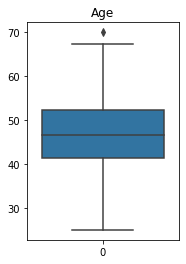

In [16]:
plt.subplot(1,2,1)
plt.title("Age")
sns.boxplot(data = X["Age"])


In [17]:
q1=X["Age"].quantile(0.25)
q3=X["Age"].quantile(0.75)
iqr=q3-q1
lowerBound=q1-1.5*iqr
upperBound=q3+1.5*iqr

X=X[(X["Age"]>lowerBound) & (X["Age"]<upperBound)]

<AxesSubplot:title={'center':'Age'}>

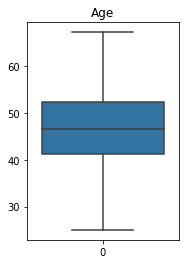

In [18]:
plt.subplot(1,2,1)
plt.title("Age")
sns.boxplot(data = X["Age"])


In [19]:
y=y[X.index]

As we can see, there are no more outlaier

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)

In [21]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(399, 2)
(399,)
(100, 2)
(100,)


In [22]:
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

# STEP #5: EVALUATING THE SVM MODEL

In [23]:
y_predict = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
print(cm)

from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(y_test, y_predict)

[[36  4]
 [ 9 51]]


0.87

<AxesSubplot:>

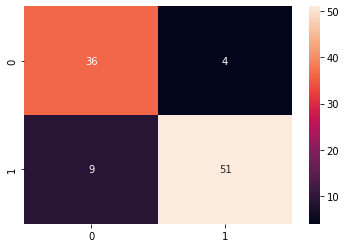

In [24]:
sns.heatmap(cm, annot=True)

# STEP #6: IMPROVING THE MODEL

In [25]:
min_train = X_train.min()
min_train

Age             25.0
401K Savings    10.0
dtype: float64

In [26]:
range_train = (X_train - min_train).max()
range_train

Age                 39.703339
401K Savings    999990.000000
dtype: float64

In [27]:
X_train_scaled = (X_train - min_train)/range_train

In [28]:
X_train_scaled

,Age,401K Savings
107,0.594173,0.700153
429,0.153406,0.277525
71,0.526000,0.289937
474,0.462638,0.408809
6,0.367055,0.578646
...,...,...
324,0.286576,0.308755
192,0.501588,0.996461
117,0.656164,0.563442
47,0.626909,0.425905


In [29]:
y_train

107    1
429    0
71     0
474    0
6      0
      ..
324    0
192    1
117    0
47     1
172    0
Name: Retire, Length: 399, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='401K Savings'>

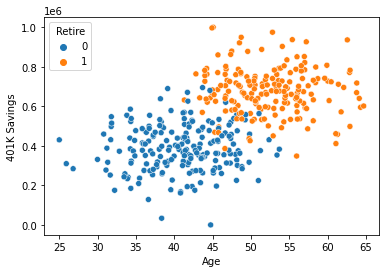

In [30]:
sns.scatterplot(x = X_train['Age'], y = X_train['401K Savings'], hue = y_train)


<AxesSubplot:xlabel='Age', ylabel='401K Savings'>

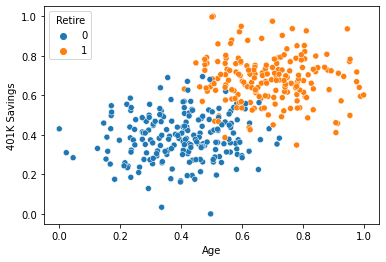

In [31]:
sns.scatterplot(x = X_train_scaled['Age'], y = X_train_scaled['401K Savings'], hue = y_train)

In [32]:
min_test = X_test.min()
range_test = (X_test - min_test).max()
X_test_scaled = (X_test - min_test)/range_test

In [33]:
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix

svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)

SVC()

In [34]:
y_predict = svc_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predict)

from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(y_test, y_predict)



0.87

<AxesSubplot:>

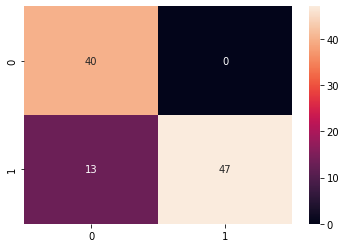

In [35]:
sns.heatmap(cm,annot=True,fmt="d")

In [36]:
# aply k fold cross validation to the svm model
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=svc_model, X=X_train, y=y_train, cv=10)
accuracies.mean()
accuracies.std()
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))  #<-------------------mean
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))#<------------------std
accuracies

Accuracy: 88.97 %
Standard Deviation: 5.16 %


array([0.875     , 0.95      , 0.8       , 0.825     , 0.95      ,
       0.9       , 0.95      , 0.925     , 0.85      , 0.87179487])

In [37]:
# preforming grid search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = {'C': [0.25,0.5,0.75,1], 'kernel': ['linear']}
grid_search = GridSearchCV(estimator=svc_model, param_grid=parameters, scoring='accuracy', cv=10, n_jobs=-1)
grid_search = grid_search.fit(X_train, y_train)
best_parameters_svm = grid_search.best_params_
best_accuracy_svm = grid_search.best_score_
print('Best Accuracy:', best_accuracy_svm)
print('Best Parameters:', best_parameters_svm)

Best Accuracy: 0.8945512820512821
Best Parameters: {'C': 0.25, 'kernel': 'linear'}


## ROC Curve for the model

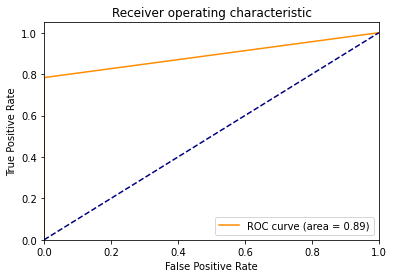

In [38]:
# create roc curve plot
from sklearn.metrics import roc_curve, auc
fig, ax = plt.subplots()
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### The ROC plot summarizes all of confusion matrices that each threshold produced.

#### As we can see the accuracy score is high enough to be used for the prediction and the std is not too high

### And now for optimizing the model accuracy score and the model parameters using Grid Search

### `Checking for overfitting in the model`

In [39]:
y_pred_train = svc_model.predict(X_train)
print('Training-set accuracy score:{0:0.4f}'. format(accuracy_score(y_train, y_pred_train) ))

y_pred_test = svc_model.predict(X_test)
print('testing-set accuracy score:{0:0.4f}'. format(accuracy_score(y_test, y_pred_test) ))


print('Training set score: {:.4f}'.format(svc_model.score(X_train, y_train) ))
print('Test set score: {:.4f}'.format(svc_model.score(X_test, y_test) ))

diffrence=abs(svc_model.score(X_test, y_test)-svc_model.score(X_train, y_train))
diffrence

Training-set accuracy score:0.5263
testing-set accuracy score:0.4000
Training set score: 0.5263
Test set score: 0.4000


0.12631578947368416

# `Implementing a KNN model`

Recreating the x and y

In [40]:
X = bank_df.drop(['Retire'],axis=1)
y = bank_df['Retire']



#### Spliting x and y into train and test

In [41]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)

In [42]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(400, 2)
(400,)
(100, 2)
(100,)


### `KNN Implementation`

In [43]:
def distance(p1,p2):
  p1 = np.array(p1)
  p2 = np.array(p2)
  return np.sqrt(np.sum((p1-p2)**2))

def predict(tps, xtrain, ytrain, k):
  ret = [] # Array containing prediction results
  for tp in tps: # For test point in test points array... 
    distances = [] # Array <==> [Distance from test point n to train point n, label of train point n]
    for n in range(len(xtrain)):
      d = (distance(tp,xtrain.iloc[n]),ytrain.iloc[n])
      distances.append(d)
    
    distances.sort() # Sort by distance

    zeros = 0
    ones = 0
    
    for i in range(k):
      if (distances[i][1] == 0):
        zeros += 1
      if (distances[i][1] == 1):
        ones += 1

    if (zeros > ones):
      ret.append(0)
    else:
      ret.append(1)
      
  return ret

## checking for the best accuracy while finding the best k

In [44]:
k_accuracy_dict = {k : 1 - sum(y_test != (predict(X_test.values, X_train, y_train, k))) / len(y_test) for k in range(1,64,2)} # Using Python 3 dictionary comprehension
print(k_accuracy_dict) # key = k ; value = accuracy --> k: accuracy
print("Best accuracy = ",max(k_accuracy_dict.values()))

{1: 0.89, 3: 0.88, 5: 0.89, 7: 0.92, 9: 0.92, 11: 0.9299999999999999, 13: 0.9299999999999999, 15: 0.9299999999999999, 17: 0.94, 19: 0.9299999999999999, 21: 0.9299999999999999, 23: 0.89, 25: 0.88, 27: 0.88, 29: 0.88, 31: 0.89, 33: 0.88, 35: 0.88, 37: 0.88, 39: 0.88, 41: 0.88, 43: 0.88, 45: 0.88, 47: 0.88, 49: 0.88, 51: 0.88, 53: 0.88, 55: 0.88, 57: 0.88, 59: 0.88, 61: 0.88, 63: 0.88}
Best accuracy =  0.94


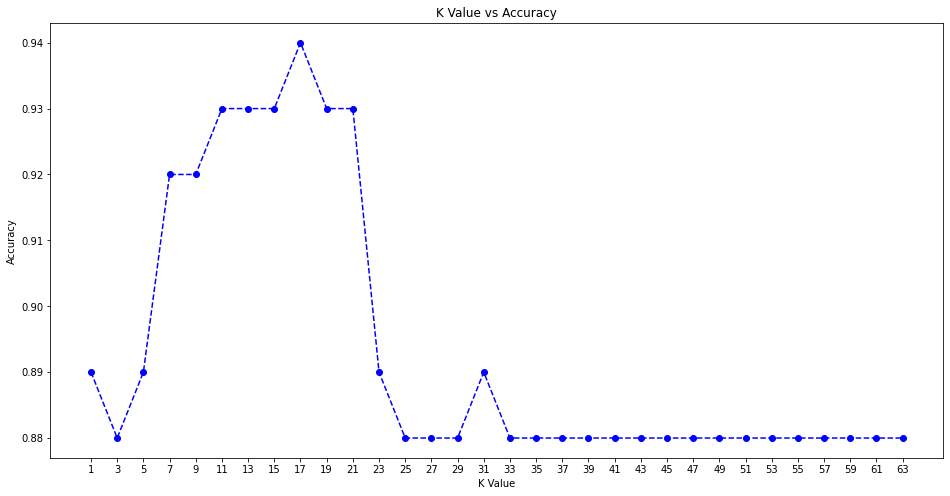

In [45]:
plt.figure(figsize=[16,8])
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title("K Value vs Accuracy")
plt.xticks(list(k_accuracy_dict.keys()))
plt.plot(list(k_accuracy_dict.keys()), list(k_accuracy_dict.values()), 'bo--')
best_k = 13

## Scaling the data using the MinMax Scaler.

In [46]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train) # Fit the X_train data on the scaler and scale it accordingly
X_test = scaler.transform(X_test) # Scale the X_test data

#### Checking for the incorrect indexing and Correcting the indexing

In [47]:
# Check which data might be susceptible to incorrect indexing
[type(d) for d in [X_train, y_train, X_test, y_test]]
# Fix indexing accordingly
y_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

#### Training `KNN` model

In [48]:
# train an new knn model
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

#### Predicting the test data

In [49]:
# predict the test set results
pred = knn_classifier.predict(X_test)
pred

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1])

#### Display the accuracy score

In [50]:
accuracy=knn_classifier.score(X_test, y_test)
print("Accuracy:",accuracy)

Accuracy: 0.95


### Visualize the results

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.95      0.96      0.96        57

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



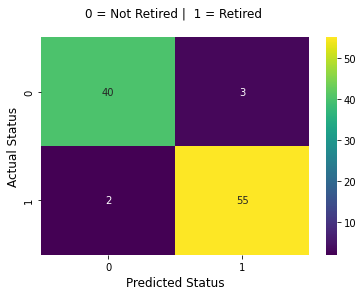

In [51]:
cmat = confusion_matrix(y_test, pred)
fig, ax = plt.subplots()
sns.heatmap(cmat, cmap="viridis", annot=cmat, ax = ax)
plt.title("0 = Not Retired |  1 = Retired \n")
plt.xlabel("Predicted Status", fontsize = 12)
plt.ylabel("Actual Status", fontsize = 12)
print(classification_report(y_test, pred))

<h1>Preforming K-Fold cross validation on the model

In [52]:
# preforming the k fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=knn_classifier, X=X_train, y=y_train, cv=10)
accuracies.mean()
accuracies.std()

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))  #<-------------------mean
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))#<------------------std
accuracies

Accuracy: 94.50 %
Standard Deviation: 3.50 %


array([0.975, 0.975, 0.95 , 0.9  , 0.875, 0.95 , 1.   , 0.95 , 0.95 ,
       0.925])

<h1>Applying Grid Search to find the best model and the best parameters

In [53]:
# preforming grid search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'n_neighbors': [1,3,5,7,9,11,13,15,17],'p':[1,2], 'weights':['uniform','distance'], 'algorithm':['auto','ball_tree','kd_tree','brute'],}]    
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=parameters, scoring='accuracy', cv=10)
grid_search = grid_search.fit(X_train, y_train)
best_parameters_knn2 = grid_search.best_params_
best_accuracy_knn2 = grid_search.best_score_
print('Best Accuracy:', best_accuracy_knn2)
print('Best Parameters:', best_parameters_knn2)

Best Accuracy: 0.9525
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}


### `Checking for overfitting in the model`

In [54]:
#Check for overfitting and underfitting Achieved by evaluating the scores on training and test set
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score

y_pred_train = knn_classifier.predict(X_train)
print('Training-set accuracy score:{0:0.4f}'. format(accuracy_score(y_train, y_pred_train) ))

y_pred_test = knn_classifier.predict(X_test)
print('testing-set accuracy score:{0:0.4f}'. format(accuracy_score(y_test, y_pred_test) ))


print('Training set score: {:.4f}'.format(knn_classifier.score(X_train, y_train) ))
print('Test set score: {:.4f}'.format(knn_classifier.score(X_test, y_test) ))

diffrence=abs(knn_classifier.score(X_test, y_test)-knn_classifier.score(X_train, y_train))
diffrence


Training-set accuracy score:0.9525
testing-set accuracy score:0.9500
Training set score: 0.9525
Test set score: 0.9500


0.0025000000000000577

As we can see from the results above the training and test accuracy score is equal to the training and test score, and the difference is very low. therefore we can assume with a very high probability that there is no overfitting nor underfitting in the model.

<h1> Saving model to mongoDB

In [55]:
# Offload the model to mongo db
import pymongo
import pickle

def save_model_to_db(model, client, db, dbconnection, model_name,accuracy,parameters):
    pickled_model = pickle.dumps(model)
    myclient = pymongo.MongoClient(client)
    mydb = myclient[db]
    mycon = mydb[dbconnection]
    
    if mycon.count_documents({'model_name':model_name}) == 0:
        mycon.insert_one({'model':pickled_model,"accuracy":accuracy,"parameters":parameters,"model_name":model_name,"dbconnection":dbconnection,'model':pickled_model})
    else:
        if mycon.find_one({'model_name':model_name})['accuracy'] < accuracy:
            mycon.update_one({'model_name':model_name},{'$set':{'accuracy':accuracy,'parameters':parameters,'model_name':model_name,'dbconnection':dbconnection,'model':pickled_model}})
    
    print("saved",model_name,accuracy)

saving KNN model to mongoDB

In [56]:
save_model_to_db(knn_classifier, "mongodb://localhost:27017", "Bank_Prediction", "knn", "KNN_model", best_accuracy_knn2, best_parameters_knn2)

saved KNN_model 0.9525


saving SVM model to mongoDB

In [57]:
save_model_to_db(svc_model, client="mongodb://localhost:27017", db="Bank_Prediction", dbconnection="svm", model_name="SVM_model", accuracy=best_accuracy_svm, parameters=best_parameters_svm)

saved SVM_model 0.8945512820512821


<h1>Random Forest Model

In [58]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [59]:
y_pred_rf = rf_classifier.predict(X_test)
y_pred_rf

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1])

In [60]:
accuracy = rf_classifier.score(X_test, y_test)
print("Accuracy:",accuracy)

Accuracy: 0.93


### Visualize the random forest results

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.95      0.96      0.96        57

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



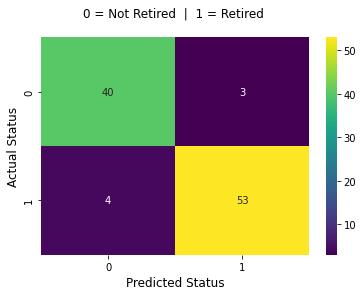

In [61]:
# Create confusion matrix based on predictions vs reality.
cmat = confusion_matrix(y_test, y_pred_rf)
fig, ax = plt.subplots()
sns.heatmap(cmat, cmap="viridis", annot=cmat, ax = ax)
plt.title("0 = Not Retired  |  1 = Retired \n")
plt.xlabel("Predicted Status", fontsize = 12)
plt.ylabel("Actual Status", fontsize = 12)
print(classification_report(y_test, pred))

<h1> Preforming K-Fold cross validation on the random forest model

In [62]:
# preforming the k fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=rf_classifier, X=X_train, y=y_train, cv=10)
accuracies.mean()
accuracies.std()

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))  #<-------------------mean
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))#<------------------std
accuracies

Accuracy: 94.25 %
Standard Deviation: 2.75 %


array([0.975, 0.925, 0.95 , 0.95 , 0.9  , 0.95 , 1.   , 0.925, 0.925,
       0.925])

#### As we can see the accuracy score is high enough to be used for the prediction and the std is not too high

<h1> Applying Grid Search to find the best model and the best parameters

In [63]:
# preforming grid search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [10,20,30], 'max_features': [2,3,4], 'max_depth': [2,3,4]}]
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=parameters, scoring='accuracy', cv=10)
grid_search = grid_search.fit(X_train, y_train)
best_parameters_rf = grid_search.best_params_
best_accuracy_rf = grid_search.best_score_
print('Best Accuracy:', best_accuracy_rf)
print('Best Parameters:', best_parameters_rf)


Best Accuracy: 0.95
Best Parameters: {'max_depth': 3, 'max_features': 2, 'n_estimators': 30}


### Confusion matrix for the optimized random forest model

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.95      0.96      0.96        57

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



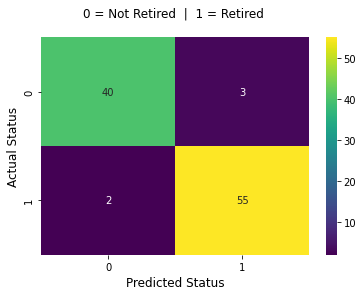

In [64]:
cmat_optimized=confusion_matrix(y_test, pred)
fig, ax = plt.subplots()
sns.heatmap(cmat_optimized, cmap="viridis", annot=cmat_optimized, ax = ax)
plt.title("0 = Not Retired  |  1 = Retired \n")
plt.xlabel("Predicted Status", fontsize = 12)
plt.ylabel("Actual Status", fontsize = 12)
print(classification_report(y_test, pred))

### `Checking for overfitting in the random forest model`

In [65]:
#Check for overfitting and underfitting Achieved by evaluating the scores on training and test set
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score

y_pred_train = rf_classifier.predict(X_train)
print('Training-set accuracy score:{0:0.4f}'. format(accuracy_score(y_train, y_pred_train) ))

y_pred_test = rf_classifier.predict(X_test)
print('testing-set accuracy score:{0:0.4f}'. format(accuracy_score(y_test, y_pred_test) ))


print('Training set score: {:.4f}'.format(rf_classifier.score(X_train, y_train) ))
print('Test set score: {:.4f}'.format(rf_classifier.score(X_test, y_test) ))

diffrence=abs(rf_classifier.score(X_test, y_test)-rf_classifier.score(X_train, y_train))
diffrence

Training-set accuracy score:1.0000
testing-set accuracy score:0.9300
Training set score: 1.0000
Test set score: 0.9300


0.06999999999999995

### `As we can see model is not overfitting`

As we can see from the results above the training and test accuracy score is equal to the training and test score, and the difference is very low. therefore we can assume with a very high probability that there is no overfitting nor underfitting in the model.

### saving Random Forest model to mongoDB

In [66]:
save_model_to_db(svc_model, client="mongodb://localhost:27017", db="Bank_Prediction", dbconnection="Random_Forest", model_name="Random_Forest_model", accuracy=best_accuracy_rf, parameters=best_parameters_rf)

saved Random_Forest_model 0.95


# Now after we trained and optimized the KNN, SVM, and Random Forest Models we will compare the accuracy score and the parameters of the three models

In [67]:
print(f'Best Accuracy knn model: {best_accuracy_knn2}')
print(f'Best Accuracy svm model: {best_accuracy_svm}')
print(f'Best Accuracy rf model: {best_accuracy_rf}')

Best Accuracy knn model: 0.9525
Best Accuracy svm model: 0.8945512820512821
Best Accuracy rf model: 0.95


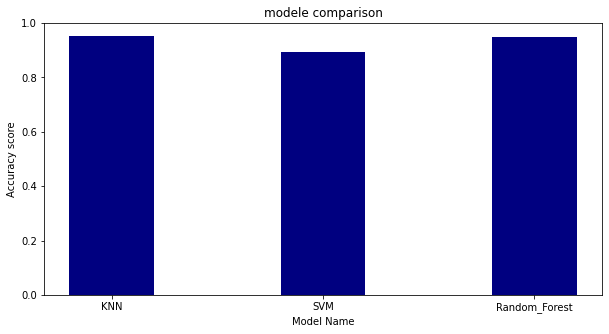

In [68]:
import pandas as pd

data={'Model_Name':['KNN','SVM','Random_Forest'],'Accuracy_Score':[best_accuracy_knn2,best_accuracy_svm,best_accuracy_rf]}

final_df = pd.DataFrame(data)
  
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(final_df["Model_Name"],final_df["Accuracy_Score"], color ='navy',
        width = 0.4)
 
plt.xlabel("Model Name")
plt.ylabel("Accuracy score")
plt.title("modele comparison")
plt.show()

## From the accuracy scores we can conclude that the most efficient model to use in this case is the KNN model, with a 0.9525 precent.  As we can see above, both the svm and the Random Forest brought  results of 0.894 and 0.9525 precent.

<h1> In conclusion, the SVM Model is the model with the higher prediction accuracy score in this case